# **2D Convolution**
*presented by Darshana Subhash*

**Kernel slides along 2 dimensions that is: along the width from left to right and along the height from top to bottom.Hence the term 2D Convolution**.

In [37]:
from IPython.display import Image
Image(url='https://i.stack.imgur.com/SFST9.gif')

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
import pandas as pd 
import math

In [27]:
def convolution_2D(input, filter, bias, stride, padding):
    
    if len(filter.shape)==3:#Condition  for Single Input-sequence with fiter(s)
        if not len(filter.shape) == 3:
            raise ValueError("The size of the filter should be (filter_height, filter_width, filter_depth)")
        
        if not len(input.shape) == 3:
            raise ValueError("The size of the input should be (input_height, input_width, input_depth)")
       
        input_height, input_width = input.shape[1], input.shape[2]      # input height and input width
        kernel_height, kernel_width = filter.shape[1], filter.shape[2]  # filter height and filter width
        output_depth=filter.shape[0]
    
        if padding == 'VALID':
            output_height = int(math.ceil(float(input_height - kernel_height + 1) / float(stride[0])))
            output_width = int(math.ceil(float(input_width - kernel_width + 1) / float(stride[1])))
        
            output_featuremap = np.zeros((output_depth,output_height, output_width)) 
            for filter_num in range(filter.shape[0]):
                print("Filter",filter_num+1)
                print(filter[filter_num,:,:])
                for x in range(output_width):  # Loop over every cell of the output
                    for y in range(output_height):
                        
                # element-wise multiplication of the filter and the image
                        output_featuremap[filter_num,y,x]=(filter[filter_num,:,:] * input[:,y * stride[0]:y * stride[0] + kernel_height,
                                x * stride[1]:x * stride[1] + kernel_width]).sum() + bias
                        
                
        
        if padding == 'SAME':
            output_height = int(math.ceil(float(input_height) / float(stride[0])))
            output_width = int(math.ceil(float(input_width) / float(stride[1])))
        
        
            if input_height % stride[0] == 0:
                pad_height = max((kernel_height - stride[0]), 0)
            else:
                pad_height = max(kernel_height - (input_height % stride[0]), 0)
            if input_width % stride[1] == 0:
                pad_width = max((kernel_width - stride[1]), 0)
            else:
                pad_width = max(kernel_width - (input_width % stride[1]), 0)
            
            pad_top = pad_height // 2 
            pad_bottom = pad_height - pad_top 
            pad_left = pad_width // 2           
            pad_right = pad_width - pad_left    
        
            output_featuremap = np.zeros((output_depth,output_height,output_width))  # convolution output
        # Input with zero padding
            input_padded = np.zeros((input.shape[0],input.shape[1] + pad_height, input.shape[2] + pad_width))
            input_padded[:,pad_top:-pad_bottom, pad_left:-pad_right] = input
            print("Input after padding\n",input_padded)
            for filter_num in range(filter.shape[0]):
                print("Filter",filter_num+1)
                print(filter[filter_num,:,:])
                for x in range(output_width):  
                    for y in range(output_height):
                        
                # Convolution result using element-wise multiplication of the filter and input
                        output_featuremap[filter_num,y, x] = (filter[filter_num,:,:] * input_padded[:,y * stride[0]:y * stride[0] + kernel_height,
                                x * stride[1]:x * stride[1] + kernel_width]).sum() + bias
        
    elif len(filter.shape)==4:     
            #Condition for  One or more Input, multiple filter with depth/layers/channels(depends on Input sequence)
        if not len(filter.shape) == 4:
            raise ValueError("The size of filter should be (filter_height, filter_width, filter_depth, number_of_filters)")
        
        if not len(input.shape) == 3:
            raise ValueError("The size of the input should be (input_height, input_width, input_depth)")
        

        
        input_height,input_width = input.shape[1], input.shape[2] # input height and input width
        kernel_height,kernel_width = filter.shape[2], filter.shape[3]  # filter height and filter width
        output_depth = filter.shape[0] 
    
        if padding == 'VALID':
            output_height = int(math.ceil(float(input_height - kernel_height + 1) / float(stride[0])))
            output_width = int(math.ceil(float(input_width - kernel_width + 1) / float(stride[1])))
        
            output_featuremap = np.zeros((output_depth, output_height, output_width))  
            for filter_num in range(filter.shape[0]):#Loop over filters
                print("Filter",filter_num+1)
                for ch in range(filter.shape[1]):# Loop over every channel of the filter
                    print("Layer"+str(ch+1)+"\nFilter is:"+str(filter[filter_num,ch,:,:]))
                    for x in range(output_width):  
                        for y in range(output_height):
                            
                       # Convolution result using element-wise multiplication of the filter and input
                            conv_map = (filter[filter_num,ch, :,:]*input[:,y * stride[0]:y * stride[0] + kernel_height,x * stride[1]:x * stride[1] + kernel_width]).sum()
                            output_featuremap[filter_num,y,x]=np.add(output_featuremap[filter_num,y,x],conv_map)
    

        if padding == 'SAME':
            output_height = int(math.ceil(float(input_height) / float(stride[0])))
            output_width = int(math.ceil(float(input_width) / float(stride[1])))
        
        
            if input_height % stride[0] == 0:
                pad_height = max((kernel_height - stride[0]), 0)
            else:
                pad_height = max(kernel_height - (input_height % stride[0]), 0)
            if input_width % stride[1] == 0:
                pad_width = max((kernel_width - stride[1]), 0)
            else:
                pad_width = max(kernel_width - (input_width % stride[1]), 0)
            
            pad_top = pad_height // 2
            pad_bottom = pad_height - pad_top 
            pad_left = pad_width // 2             
            pad_right = pad_width - pad_left     
        
            output_featuremap = np.zeros((output_depth,output_height, output_width))
            # Input with zero padding 
            input_padded = np.zeros((input.shape[0],input.shape[1] + pad_height, input.shape[2] + pad_width))
            input_padded[:,pad_top:-pad_bottom, pad_left:-pad_right] = input
            print("Input after padding\n",input_padded)
            for filter_num in range(filter.shape[0]):#loop over filters
                print("Filter",filter_num+1)
                for ch in range(filter.shape[1]):# Loop over every channel of the filter
                    print("Layer"+str(ch+1)+"\nFilter is:"+str(filter[filter_num,ch,:,:]))
                    for x in range(output_width):  
                        for y in range(output_height):
                            
                    # element-wise multiplication of the input and filter
                            conv_map= (filter[filter_num,ch,:,:] * input_padded[:,y * stride[0]:y * stride[0] + kernel_height, x * stride[1]:x * stride[1] + kernel_width]).sum()
                            output_featuremap[filter_num,y,x]=np.add(output_featuremap[filter_num,y,x],conv_map)
                            
                   
                
    return output_featuremap


<B>1. Build your own “2-D Convolution” function file to perform the convolution operation, given the input matrix of size m x m and one filter of size f x f, such that the ouput convolution length is given by m-f+1.   

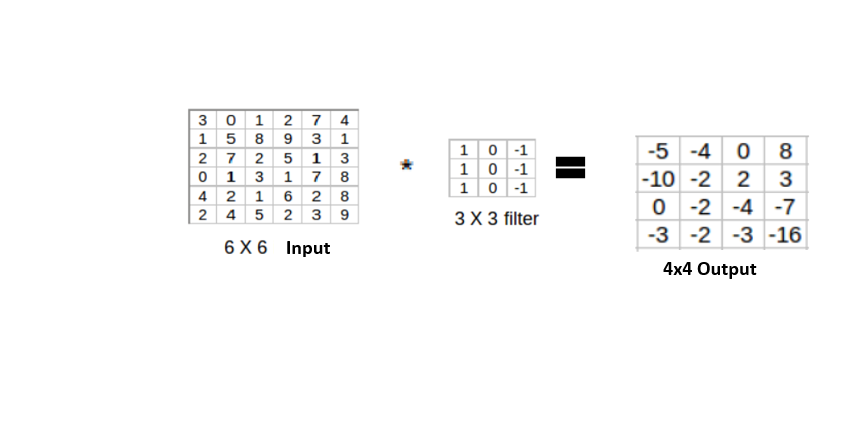

In [28]:
np.random.seed(1)

print("Test1:For hardcoded Input and fiter values with default padding(VALID)\n")
input=np.array([[3,0,1,2,7,4],[1,5,8,9,3,1],[2,7,2,5,1,3],[0,1,3,1,7,8],[4,2,1,6,2,8],[2,4,5,2,3,9]])
print("Input:"+str(input)+"\n"+"Input Shape:"+str(input.shape))
input=input.reshape((1,input.shape[0],input.shape[1]))

kernel=np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
kernel=kernel.reshape((1,kernel.shape[0],kernel.shape[1]))
Feature_Map=convolution_2D(input,kernel,0,(1,1),'VALID')
print("Output Feature Map is:",str(Feature_Map)+"\n"+"Output shape:"+str(Feature_Map.shape))


print("\nTest2:For random Input and fiter values\n")
input=np.random.randint(5, size=(1,4,4))
print("Input:"+str(input)+"\n")

kernel = np.random.randint(5,size=(1,3,3))
print("Kernel:",kernel)

Feature_Map=convolution_2D(input,kernel,0,(1,1),'VALID')

print("Output Feature Map is:\n",str(Feature_Map)+"\n"+"Output shape:"+str(Feature_Map.shape))
print("Input Shape:"+str(input.shape))

Test1:For hardcoded Input and fiter values with default padding(VALID)

Input:[[3 0 1 2 7 4]
 [1 5 8 9 3 1]
 [2 7 2 5 1 3]
 [0 1 3 1 7 8]
 [4 2 1 6 2 8]
 [2 4 5 2 3 9]]
Input Shape:(6, 6)
Filter 1
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Output Feature Map is: [[[ -5.  -4.   0.   8.]
  [-10.  -2.   2.   3.]
  [  0.  -2.  -4.  -7.]
  [ -3.  -2.  -3. -16.]]]
Output shape:(1, 4, 4)

Test2:For random Input and fiter values

Input:[[[3 4 0 1]
  [3 0 0 1]
  [4 4 1 2]
  [4 2 4 3]]]

Kernel: [[[4 2 4]
  [2 4 1]
  [1 0 1]]]
Filter 1
[[4 2 4]
 [2 4 1]
 [1 0 1]]
Output Feature Map is:
 [[[31. 27.]
  [45. 23.]]]
Output shape:(1, 2, 2)
Input Shape:(1, 4, 4)


<B>2. Build your own “2-D Convolution” function file to perform the convolution operation  given the input matrix of size m x m and one filter of size f x f,, such that the ouput convolution length is same as that of the length of the input sequence.    

In [30]:
np.random.seed(1)

print("Test1:For hardcoded Input and fiter values with zero padding(SAME)\n")
input=np.array([[3,0,1,2,7,4],[1,5,8,9,3,1],[2,7,2,5,1,3],[0,1,3,1,7,8],[4,2,1,6,2,8],[2,4,5,2,3,9]])
print("Input:"+str(input)+"\n"+"Input Shape:"+str(input.shape))
input=input.reshape((1,input.shape[0],input.shape[1]))

kernel=np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
kernel=kernel.reshape((1,kernel.shape[0],kernel.shape[1]))
Feature_Map=convolution_2D(input,kernel,0,(1,1),'SAME')
print("Output Feature Map is:",str(Feature_Map)+"\n"+"Output shape:"+str(Feature_Map.shape))


print("\nTest2:For random Input and fiter values\n")
input=np.random.randint(5, size=(1,4,4))
print("Input:"+str(input)+"\n")

kernel = np.random.randint(5,size=(1,3,3))
print("Kernel:",kernel)

Feature_Map=convolution_2D(input,kernel,0,(1,1),'SAME')

print("Output Feature Map is:\n",str(Feature_Map)+"\n"+"Output shape:"+str(Feature_Map.shape))
print("Input Shape:"+str(input.shape))

Test1:For hardcoded Input and fiter values with zero padding(SAME)

Input:[[3 0 1 2 7 4]
 [1 5 8 9 3 1]
 [2 7 2 5 1 3]
 [0 1 3 1 7 8]
 [4 2 1 6 2 8]
 [2 4 5 2 3 9]]
Input Shape:(6, 6)
Input after padding
 [[[0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 3. 0. 1. 2. 7. 4. 0.]
  [0. 1. 5. 8. 9. 3. 1. 0.]
  [0. 2. 7. 2. 5. 1. 3. 0.]
  [0. 0. 1. 3. 1. 7. 8. 0.]
  [0. 4. 2. 1. 6. 2. 8. 0.]
  [0. 2. 4. 5. 2. 3. 9. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0.]]]
Filter 1
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Output Feature Map is: [[[ -5.  -5.  -6.  -1.   6.  10.]
  [-12.  -5.  -4.   0.   8.  11.]
  [-13. -10.  -2.   2.   3.  11.]
  [-10.   0.  -2.  -4.  -7.  10.]
  [ -7.  -3.  -2.  -3. -16.  12.]
  [ -6.   0.  -2.   1.  -9.   5.]]]
Output shape:(1, 6, 6)

Test2:For random Input and fiter values

Input:[[[3 4 0 1]
  [3 0 0 1]
  [4 4 1 2]
  [4 2 4 3]]]

Kernel: [[[4 2 4]
  [2 4 1]
  [1 0 1]]]
Input after padding
 [[[0. 0. 0. 0. 0. 0.]
  [0. 3. 4. 0. 1. 0.]
  [0. 3. 0. 0. 1. 0.]
  [0. 4. 4. 1. 2. 0.]
  [0. 4. 2. 4. 3. 0.]
 

<B>3.Use any one of your built “Conv2” function file to  perform the convolution operation given the input matrix and ‘N1’ number of filters.        </B>

Let N1=2 filters

In [32]:
input=np.random.randint(5, size=(1,4,4))
print("Input:"+str(input)+"\n")

kernel = np.random.randint(5,size=(2,3,3))
print("Kernel:",kernel)

Feature_Map=convolution_2D(input,kernel,0,(1,1),'VALID')

print("Output Feature Map is:\n",str(Feature_Map)+"\n"+"Output shape:"+str(Feature_Map.shape))
print("Input Shape:"+str(input.shape))

Input:[[[1 3 4 3]
  [1 3 0 0]
  [2 2 1 3]
  [4 2 0 0]]]

Kernel: [[[1 1 3]
  [0 0 4]
  [2 4 3]]

 [[3 0 3]
  [4 3 4]
  [4 4 1]]]
Filter 1
[[1 1 3]
 [0 0 4]
 [2 4 3]]
Filter 2
[[3 0 3]
 [4 3 4]
 [4 4 1]]
Output Feature Map is:
 [[[31. 33.]
  [24. 19.]]

 [[45. 45.]
  [45. 40.]]]
Output shape:(2, 2, 2)
Input Shape:(1, 4, 4)


<B>4. Use any one of your built “Conv2” function file to  perform the convolution operation given theinput matrix and ‘N1’ number of filters, followed by the convolution operation with ‘N2’ number offilters, where N2>N1.</B>

Let N1=2 filters; N2=3 filters

In [33]:
N1=2
N2=3
np.random.seed(1)
print("Convolution Layer1 with two filters:")
input=np.random.randint(5, size=(1,7,7))
print("Input:"+str(input)+"\n")

kernel = np.random.randint(5,size=(N1,3,3))
print("Kernel:",kernel)

Convolution_Layer1=convolution_2D(input,kernel,0,(1,1),'VALID')

print("Output Feature Map is:\n",str(Convolution_Layer1)+"\n"+"Output shape:"+str(Convolution_Layer1.shape))
print("Input Shape:"+str(input.shape))
print("\nConvolution Layer2 with three filters\n")
input=Convolution_Layer1

print("Input:"+str(input)+"\n")
filters = np.random.randint(3,size=(N2,input.shape[0],3,3))
print("Filters:",filters)

print(kernel.shape)
Convolution_Layer2=convolution_2D(input,filters,0,(1,1),'VALID')
print("Output Feature Map:\n"+str(Convolution_Layer2)+"\nOutput shape:"+str(Convolution_Layer2.shape))
print("Input shape:",input.shape)

Convolution Layer1 with two filters:
Input:[[[3 4 0 1 3 0 0]
  [1 4 4 1 2 4 2]
  [4 3 4 2 4 2 4]
  [1 1 0 1 1 1 1]
  [0 4 1 0 0 3 2]
  [1 0 3 1 1 3 4]
  [0 1 3 4 2 4 0]]]

Kernel: [[[3 1 2]
  [0 4 1]
  [2 2 1]]

 [[0 1 3]
  [4 3 1]
  [3 0 0]]]
Filter 1
[[3 1 2]
 [0 4 1]
 [2 2 1]]
Filter 2
[[0 1 3]
 [4 3 1]
 [3 0 0]]
Output Feature Map is:
 [[[51. 47. 29. 32. 43.]
  [35. 39. 32. 36. 31.]
  [36. 28. 29. 22. 35.]
  [26. 16. 12. 16. 32.]
  [14. 38. 24. 29. 35.]]

 [[36. 41. 43. 23. 34.]
  [48. 36. 33. 39. 39.]
  [22. 27. 21. 18. 22.]
  [17. 22. 17. 10. 18.]
  [14. 14. 25. 31. 32.]]]
Output shape:(2, 5, 5)
Input Shape:(1, 7, 7)

Convolution Layer2 with three filters

Input:[[[51. 47. 29. 32. 43.]
  [35. 39. 32. 36. 31.]
  [36. 28. 29. 22. 35.]
  [26. 16. 12. 16. 32.]
  [14. 38. 24. 29. 35.]]

 [[36. 41. 43. 23. 34.]
  [48. 36. 33. 39. 39.]
  [22. 27. 21. 18. 22.]
  [17. 22. 17. 10. 18.]
  [14. 14. 25. 31. 32.]]]

Filters: [[[[2 2 1]
   [0 2 2]
   [2 0 0]]

  [[1 1 1]
   [0 0 1]
   [1 2 0]]]

<B>5. Compute the number of learnable parameters for Q.No.4.  Validate your  computation with the number of learnable parameters given by Keras-Tensorflow framework. </B>

Number of learnable parameters is compted as follows:

<B>(shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters</B>

Size of kernel/filter: (shape of width of the filter * shape of height of the filter* number of filters in the previous convolution layer/depth of current filter*number of filters in the current convolution layer)+bias/number of filters in the current layer

In [26]:
def LearnableParams(kernel,filters):
  Convo_layers=2
  Total_params=0
  if(Convo_layers>1):
    Layer1=np.size(kernel)+N1
    print("Conv2d_4")
    print("Number of Learnable Parameters:",Layer1)
    Total_params+=Layer1
    Layer2=np.size(filters)+N2
    print("Conv2d_5")
    print("Number of Learnable Parameters:",Layer2)
    Total_params+=Layer2
    print("Total Number of Params:",Total_params)
LearnableParams(kernel,filters)

Conv2d_4
Number of Learnable Parameters: 20
Conv2d_5
Number of Learnable Parameters: 57
Total Number of Params: 77


<B> Validate with in-built Convolution 2D function

In [34]:

clf = tf.keras.models.Sequential()
clf.add(Conv2D(filters=N1, kernel_size=(3,3), padding='valid',input_shape = (7,7,1)))
clf.add(Conv2D(filters=N2, kernel_size=(3,3), padding='valid'))
clf.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 5, 5, 2)           20        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 3)           57        
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
